In [69]:
import pandas as pd
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor

In [70]:
oppScrData = pd.read_excel ('OppScrData.xlsx')

Utils

In [71]:
def normalize_ss(data):
  return StandardScaler().fit_transform(data)

def normalize_min_max(data):
    n = data.shape[1]    
    for i in range(n-1):
      data[:,i] = (data[:,i] - np.min(data[:,i]))/(np.max(data[:,i])- np.min(data[:,i]))
    return data

def plot(y_pred, y_test):
  plt.figure()
  x = [i+1 for i in range(len(y_test))]
  plt.plot((x,x),([i for i in y_pred], [j for j in y_test]),c='green')
  plt.scatter(x, y_pred, label="predicted_y")
  plt.scatter(x, y_test, label="actual_y")
  plt.legend()
  plt.show()

def mean_absolute_error(actual, predictions):
  n = len(actual)
  return sum(abs(actual - predictions))/n


Get all dead people

In [8]:
def get_dead_people_ct_data(oppScrData):
    # Delete rows with empty values
    ct_data= oppScrData[['Age at CT', 'DEATH [d from CT]','Sex', "L1_HU_BMD", "TAT Area (cm2)", 'Total Body                Area EA (cm2)',
       'VAT Area (cm2)', 'SAT Area (cm2)', 'VAT/SAT     Ratio', 'Muscle HU',
       ' Muscle Area (cm2)', 'L3 SMI (cm2/m2)', 'AoCa        Agatston',
       'Liver HU    (Median)']]
    n = ct_data.shape[0]
    dead_people_ct_data = []

    for i in range(n):
        row = ct_data.loc[i]
        ignore = False
        for j in row:
          if pd.isna(j) or j == ' ': # There is an empty string somewhere in Liver column
            ignore = True
            break          

        if (not ignore) and (not pd.isna(row['DEATH [d from CT]'])):
          row[0] = (row['Age at CT']*365 + row['DEATH [d from CT]']) - ((76.1*365) if row['Sex'] == "Male" else (81.1*365)          )
          dead_people_ct_data.append(row)

    dead_people_ct_data = np.array(dead_people_ct_data)
    dead_people_ct_data = np.delete(dead_people_ct_data, 1, 1)
    dead_people_ct_data = np.delete(dead_people_ct_data, 1, 1)
    return np.array(dead_people_ct_data, dtype=np.float32)

# dead_people_ct_data[0] -> number of days lost
# dead_people_ct_data[1:] -> ct_data


In [72]:
dead_people_ct_data = get_dead_people_ct_data(oppScrData)

<ipython-input-8-81c8ef95b4dd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row[0] = (row['Age at CT']*365 + row['DEATH [d from CT]']) - ((76.1*365) if row['Sex'] == "Male" else (81.1*365)          )


In [73]:
y = dead_people_ct_data[:,0]
# X = normalize_ss(dead_people_ct_data[:,1:])
# X = normalize_min_max(dead_people_ct_data[:,1:])
X = dead_people_ct_data[:,1:]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

x_train

array([[ 112.      ,  396.8     ,  716.008   , ...,   44.135765,
        4742.468   ,   49.      ],
       [ 185.      ,  600.24866 ,  956.5189  , ...,   88.98985 ,
         750.297   ,   45.      ],
       [ 119.      ,  637.1162  ,  843.8054  , ...,   48.639385,
          13.587   ,   30.      ],
       ...,
       [ 231.      ,  315.98462 ,  875.9513  , ...,   64.26262 ,
          40.395   ,   40.      ],
       [ 104.      ,  101.74572 ,  393.135   , ...,   47.89861 ,
        7684.902   ,   55.      ],
       [ 186.      ,  536.3838  ,  823.67566 , ...,   57.230667,
         403.442   ,   63.      ]], dtype=float32)

Linear

0.081233395863205


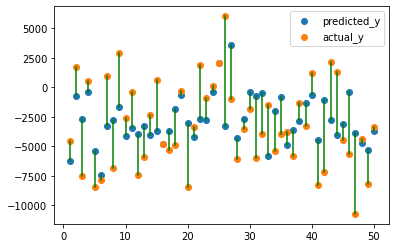

In [74]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))
plot(y_test=y_test, y_pred=y_pred)

Polynomial

3697.9448046875


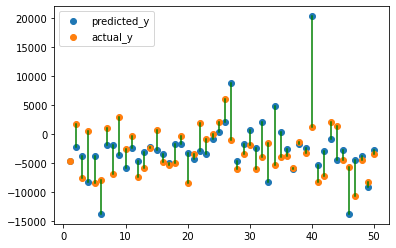

In [75]:
poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(mean_absolute_error(y_test, y_pred))
plot(y_test=y_test, y_pred=y_pred)

In [13]:
Fill biological column

SyntaxError: invalid syntax (<ipython-input-13-d218032810dd>, line 1)

In [76]:
def get_all_people_ct_data(oppScrData):
    # Delete rows with empty values
    ct_data= oppScrData[['Age at CT', "L1_HU_BMD", "TAT Area (cm2)", 'Total Body                Area EA (cm2)',
       'VAT Area (cm2)', 'SAT Area (cm2)', 'VAT/SAT     Ratio', 'Muscle HU',
       ' Muscle Area (cm2)', 'L3 SMI (cm2/m2)', 'AoCa        Agatston',
       'Liver HU    (Median)']]
    n = ct_data.shape[0]
    all_people_ct_data = []

    for i in range(n):
        row = ct_data.loc[i]
        ignore = False
        for j in row:
          if pd.isna(j) or j == ' ': # There is an empty string somewhere in Liver column
            ignore = True
            break          

        if not ignore:
          all_people_ct_data.append(row)

    return np.array(all_people_ct_data, dtype=np.float32)

# dead_people_ct_data[0] -> biological age
# dead_people_ct_data[1:] -> ct_data


In [77]:
a = get_all_people_ct_data(oppScrData)
a

array([[  55.      ,  192.      ,  485.50287 , ...,   48.41319 ,
        2709.064   ,   52.      ],
       [  52.      ,  256.      ,  490.05453 , ...,   50.101334,
           0.      ,   54.      ],
       [  60.      ,  149.      ,  289.1081  , ...,   69.11585 ,
        2586.575   ,   57.      ],
       ...,
       [  63.      ,  135.      ,  822.2872  , ...,   57.78635 ,
        1115.997   ,   45.      ],
       [  55.      ,  219.      ,  418.2     , ...,   50.929787,
        3515.371   ,   44.      ],
       [  61.      ,  151.      ,   61.54359 , ...,   29.688124,
        3015.129   ,   54.      ]], dtype=float32)

In [78]:
a[0]

array([5.5000000e+01, 1.9200000e+02, 4.8550287e+02, 6.9431427e+02,
       1.8349715e+02, 3.0200858e+02, 6.0758919e-01, 1.6150124e+01,
       1.2396874e+02, 4.8413189e+01, 2.7090640e+03, 5.2000000e+01],
      dtype=float32)

In [79]:
len(a)

8878

In [80]:
days_lost = -lr.predict(poly.fit_transform(a[:,1:]))

In [81]:
days_lost

array([2689.4756, 5214.9404, 2226.6826, ..., 6868.3115, 4699.1787,
       1836.4126], dtype=float32)

In [82]:
a[:,0] = a[:,0]*365 + days_lost


In [83]:
a[0]

array([2.2764477e+04, 1.9200000e+02, 4.8550287e+02, 6.9431427e+02,
       1.8349715e+02, 3.0200858e+02, 6.0758919e-01, 1.6150124e+01,
       1.2396874e+02, 4.8413189e+01, 2.7090640e+03, 5.2000000e+01],
      dtype=float32)

In [84]:
a[:,0]/365

array([62.368427, 66.28751 , 66.1005  , ..., 81.81729 , 67.874466,
       66.031265], dtype=float32)

In [85]:
X = a[:, 1:]
X2=a[:, 1:]
y = a[:,0]
y2=a[:,0]/365

In [86]:
X

array([[ 192.      ,  485.50287 ,  694.3143  , ...,   48.41319 ,
        2709.064   ,   52.      ],
       [ 256.      ,  490.05453 ,  706.0515  , ...,   50.101334,
           0.      ,   54.      ],
       [ 149.      ,  289.1081  ,  584.4892  , ...,   69.11585 ,
        2586.575   ,   57.      ],
       ...,
       [ 135.      ,  822.2872  , 1154.6051  , ...,   57.78635 ,
        1115.997   ,   45.      ],
       [ 219.      ,  418.2     ,  660.3461  , ...,   50.929787,
        3515.371   ,   44.      ],
       [ 151.      ,   61.54359 ,  362.88974 , ...,   29.688124,
        3015.129   ,   54.      ]], dtype=float32)

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=2)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y2, test_size=0.1, random_state=2)

In [88]:



RFmod2 = RandomForestRegressor(random_state=21)

#Choose some hyperparameter values 
param_grid2 = {
    'bootstrap': [True],
    'max_depth': [10,20,30],
    'max_features': [2, 3,4,5,6],
    'min_samples_leaf': [3, 4, 5,6,7,8,9,10],
    'min_samples_split': [8, 10, 12,14,16,18,20],
    'n_estimators': [50,30,40,20,10,100, 200, 300, 1000]
}
clfRF2 = RandomizedSearchCV(RFmod2,param_grid2,#model and parameters
                             #number of cross validation folds
                             )


clfRF2.fit(X_train,Y_train)
params3=clfRF2.best_params_
params3


{'n_estimators': 1000,
 'min_samples_split': 12,
 'min_samples_leaf': 7,
 'max_features': 6,
 'max_depth': 20,
 'bootstrap': True}

In [89]:
RFparams2={'n_estimators':[30],
          'min_samples_split':[16],
          'min_samples_leaf': [9],
           'max_features': [6],
           'max_depth': [30],
           'bootstrap': [True]}

rf = RandomForestRegressor(random_state = 21)


clf= RandomizedSearchCV(rf,RFparams2,refit=True)
clf.fit(X_train,Y_train)
        
clf.best_estimator_.score(X_test, Y_test)

/Users/sanyamkakkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.2960801515298803

In [90]:
y_pred=clf.predict(X_test)

In [91]:
mean_absolute_error(Y_test,y_pred)

1909.4241374759786

with years


In [31]:

RFmod2 = RandomForestRegressor(random_state=21)

#Choose some hyperparameter values 
param_grid2 = {
    'bootstrap': [True],
    'max_depth': [10,20,30],
    'max_features': [2, 3,4,5,6],
    'min_samples_leaf': [3, 4, 5,6,7,8,9,10],
    'min_samples_split': [8, 10, 12,14,16,18,20],
    'n_estimators': [50,30,40,20,10,100, 200, 300, 1000]
}
clfRF2 = RandomizedSearchCV(RFmod2,param_grid2,#model and parameters
                             #number of cross validation folds
                             )


clfRF2.fit(X_train,Y_train)
params3=clfRF2.best_params_
params3



{'n_estimators': 200,
 'min_samples_split': 14,
 'min_samples_leaf': 10,
 'max_features': 5,
 'max_depth': 30,
 'bootstrap': True}

In [32]:
RFparams2={'n_estimators':[200],
          'min_samples_split':[14],
          'min_samples_leaf': [10],
           'max_features': [5],
           'max_depth': [30],
           'bootstrap': [True]}

rf = RandomForestRegressor(random_state = 21)


clf= RandomizedSearchCV(rf,RFparams2,refit=True)
clf.fit(X_train2,Y_train2)
        
clf.best_estimator_.score(X_test2, Y_test2)

/Users/sanyamkakkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.2886298616795522

In [33]:
y_pred2=clf.predict(X_test2)
mean_absolute_error(Y_test2,y_pred2)

5.225219109203804

In [38]:
import pandas as pd
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader,IterableDataset
from sklearn.model_selection import train_test_split

In [62]:
class CT_Dataset(Dataset):

    def __init__(self, X, y):
        self.ct_data = X
        self.age = y 

    def __len__(self):
        return len(self.ct_data)

    def __getitem__(self, idx):
        ct_data = self.ct_data[idx]     
        age = np.array(self.age[idx], dtype=np.float32)
        return torch.from_numpy(ct_data), torch.from_numpy(age)

In [63]:
a = CT_Dataset(X=X_train, y = Y_train)
train_set = DataLoader(a, batch_size=64, shuffle=True)

In [64]:
def build_model():
  return nn.Sequential(
    nn.Linear(11, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Linear(64, 32),
    #nn.BatchNorm1d(32),
    #nn.ReLU(),
    nn.Linear(32, 10),
    #nn.BatchNorm1d(10),
    nn.ReLU(),
    nn.Linear(10, 1)
    )

model = build_model()

In [65]:
criterion = nn.MSELoss()

def train_model(model, train_loader, criterion, T):
  model.train()
  opt = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.1)
  # opt = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
  for epoch in range(T): 
      running_loss = 0
      for data in enumerate(train_loader):
          ct_data, actual_age = data[1][0], data[1][1]
          opt.zero_grad()
          predicted_age = model(ct_data)      
          loss = criterion(predicted_age, actual_age)
          running_loss += loss.item()*train_loader.batch_size
          loss.backward() 
          opt.step()
          
      print("​Train Epoch: "+str(epoch) + " Loss =", str(running_loss))

  model.train(mode=False)

model = build_model()
train_model(model, train_set, criterion, T = 100)

/Users/sanyamkakkar/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/sanyamkakkar/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([54])) that is different to the input size (torch.Size([54, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


​Train Epoch: 0 Loss = 5125808627712.0
​Train Epoch: 1 Loss = 4993308131328.0
​Train Epoch: 2 Loss = 4231840696320.0
​Train Epoch: 3 Loss = 2449422201856.0
​Train Epoch: 4 Loss = 719685566208.0
​Train Epoch: 5 Loss = 230200445824.0
​Train Epoch: 6 Loss = 187358773632.0
​Train Epoch: 7 Loss = 174043008960.0
​Train Epoch: 8 Loss = 165941067776.0
​Train Epoch: 9 Loss = 160717556608.0
​Train Epoch: 10 Loss = 154617599552.0
​Train Epoch: 11 Loss = 151136858816.0
​Train Epoch: 12 Loss = 146898290112.0
​Train Epoch: 13 Loss = 143097603616.0
​Train Epoch: 14 Loss = 139657802368.0
​Train Epoch: 15 Loss = 136576438944.0
​Train Epoch: 16 Loss = 133339891552.0
​Train Epoch: 17 Loss = 130578648256.0
​Train Epoch: 18 Loss = 127418870112.0
​Train Epoch: 19 Loss = 125834204800.0
​Train Epoch: 20 Loss = 123212621600.0
​Train Epoch: 21 Loss = 121101945984.0
​Train Epoch: 22 Loss = 119994490208.0
​Train Epoch: 23 Loss = 117648313312.0
​Train Epoch: 24 Loss = 116140368736.0
​Train Epoch: 25 Loss = 1141950

In [66]:
b = CT_Dataset(X=X_test, y = Y_test)
test_set = DataLoader(b, batch_size=64)
test_set

In [67]:
def evaluate_model(model, test_loader, criterion):
  model.eval()
  running_loss = 0
  with torch.no_grad():
    for data in enumerate(test_loader):
          ct_data, actual_age = data[1][0], data[1][1]
          predicted_age = model(ct_data)
          loss = criterion(predicted_age, actual_age)
          running_loss += loss.item()
  return running_loss

evaluate_model(model, test_set, criterion)

/Users/sanyamkakkar/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([56])) that is different to the input size (torch.Size([56, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


150598968.0

In [54]:
#experiemnt2 normalization

In [55]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc = StandardScaler()

In [49]:
X3=normalize_min_max(X)

In [51]:
X3

array([[5.3266335e-01, 3.9347196e-01, 2.7450114e-01, ..., 2.5568113e-01,
        7.3331073e-02, 5.2000000e+01],
       [6.9346732e-01, 3.9730248e-01, 2.8180805e-01, ..., 2.6470131e-01,
        0.0000000e+00, 5.4000000e+01],
       [4.2462310e-01, 2.2819412e-01, 2.0613065e-01, ..., 3.6630097e-01,
        7.0015438e-02, 5.7000000e+01],
       ...,
       [3.8944724e-01, 6.7689592e-01, 5.6105059e-01, ..., 3.0576441e-01,
        3.0208681e-02, 4.5000000e+01],
       [6.0050249e-01, 3.3683261e-01, 2.5335464e-01, ..., 2.6912796e-01,
        9.5156826e-02, 4.4000000e+01],
       [4.2964825e-01, 3.6685102e-02, 6.8176135e-02, ..., 1.5562810e-01,
        8.1615873e-02, 5.4000000e+01]], dtype=float32)

In [52]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.1, random_state=2)

In [54]:

RFmod= RandomForestRegressor(random_state=21)

#Choose some hyperparameter values 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,20,30],
    'max_features': [2, 3,4,5,6],
    'min_samples_leaf': [3, 4, 5,6,7,8,9,10],
    'min_samples_split': [8, 10, 12,14,16,18,20],
    'n_estimators': [50,30,40,20,10,100, 200, 300, 1000]
}
clfRF = RandomizedSearchCV(RFmod,param_grid,#model and parameters
                             #number of cross validation folds
                             )


clfRF.fit(x_train3,y_train3)
paramsexp=clfRF2.best_params_
paramsexp

{'n_estimators': 200,
 'min_samples_split': 14,
 'min_samples_leaf': 10,
 'max_features': 5,
 'max_depth': 30,
 'bootstrap': True}

In [55]:
RFparamsexp={'n_estimators':[1000],
          'min_samples_split':[12],
          'min_samples_leaf': [3],
           'max_features': [3],
           'max_depth': [20],
           'bootstrap': [True]}

rf2 = RandomForestRegressor(random_state = 21)


clf2= RandomizedSearchCV(rf2,RFparamsexp,refit=True)
clf2.fit(x_train3,y_train3)
        
clf2.best_estimator_.score(x_test3, y_test3)

/Users/sanyamkakkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.28416550446524846

In [56]:
y_pred3=clf2.predict(x_test3)
mean_absolute_error(y_test3,y_pred3)

1911.6461109913475

knn on years

In [60]:
from sklearn.neighbors import KNeighborsRegressor
knn2 = KNeighborsRegressor(n_neighbors=9)
weight_options = ["uniform", "distance"]
param_grid2 = dict(weights = weight_options)
    
grid = GridSearchCV(knn2, param_grid2)
grid.fit(x_train3,Y_train2)
p3=grid.predict(x_test3)

In [61]:
mean_absolute_error(Y_test2,p3)

5.87441780945661